# Analyzing Spotify and YouTube Datasets


By: Somya Bansal

I am choosing the YouTube and Spotify datasets in order to learn more about how different variables correlate with the popularity and success of a song. Additionally, I’ll also explore how songs from Spotify are performing compared to their YouTube uploaded version. I want to explore popularity trends, likes and dislikes, as well as amount of views. I am using the YouTube Dislikes Dataset as well, to view the likes and dislikes trends from all the songs in 2020-2021. I have chosen this time period since the YouTube Dislikes Dataset has extensive information focusing on these two years, before dislikes were removed. Overall, I want to learn about the various trends in uploaded music over different listening platforms.<br><br>

## Data Curation
These are the two datasets I am using:

Nikolaiev, D. (2021, December 17). *YouTube dislikes dataset.* Kaggle.
https://www.kaggle.com/datasets/dmitrynikolaev/youtube-dislikes-dataset/data

Rastelli, S. (2023, March 20). *Spotify and YouTube.* Kaggle.
https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

The first set contains data on various YouTube videos from August 2020 to December 2021, including how many dislikes each video received. The second set contains data on Spotify songs that also have corresponding URLs on YouTube, and it covers a broader range of years.<br><br>
To start analyzing this data, we first import the libraries that we will use throughout the tutorial.

In [34]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Next, we load both datasets into Pandas dataframes. We make sure to do a bit of cleaning as well, dropping duplicates and NA values.

In [2]:
# Reading csv files
spotify_yt = pd.read_csv('Spotify_Youtube.csv')
yt_dislike = pd.read_csv('youtube_dislike_dataset.csv')

spotify_yt.drop_duplicates(inplace=True)
spotify_yt.dropna(inplace=True)

yt_dislike.drop_duplicates(inplace=True)
yt_dislike.dropna(inplace=True)

## Exploratory Analysis

Next, we perform some basic exploratory analysis on both sets to get a sense for what the data looks like, including the columns and datatypes of both dataframes. We also use `describe` to get some initial statistical information on the datasets.

In [3]:
print('Spotify Dataset Information:')
display(spotify_yt.head())
display(spotify_yt.columns)
display(spotify_yt.dtypes)
display(spotify_yt.describe())


Spotify Dataset Information:


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04
mean,10434.934637,0.621178,0.636150,5.292645,-7.615305,0.094944,0.287817,0.055476,0.191322,0.528267,120.607345,2.247612e+05,9.719768e+07,6.823531e+05,2.838656e+04,1.382746e+08
std,5989.698716,0.165533,0.213439,3.579947,4.617605,0.104931,0.285630,0.192768,0.165217,0.244996,29.588308,1.278468e+05,2.799997e+08,1.820550e+06,1.977979e+05,2.477309e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,5240.500000,0.520000,0.510000,2.000000,-8.745000,0.035700,0.043600,0.000000,0.094100,0.338000,96.997500,1.802670e+05,2.070213e+06,2.447350e+04,5.830000e+02,1.786937e+07
50%,10500.500000,0.639000,0.667000,5.000000,-6.504000,0.050600,0.188000,0.000002,0.125000,0.535000,119.969000,2.133210e+05,1.568959e+07,1.332770e+05,3.515500e+03,5.037938e+07
75%,15640.750000,0.742000,0.798000,8.000000,-4.918500,0.104000,0.469000,0.000436,0.234000,0.724000,139.946000,2.519630e+05,7.369040e+07,5.423462e+05,1.494100e+04,1.407579e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [4]:
print('YouTube Dataset Information:')
display(yt_dislike.head())
display(yt_dislike.columns)
display(yt_dislike.dtypes)
display(yt_dislike.describe())

YouTube Dataset Information:


,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannahs energy bursts through any screen. Well...
3,--4tfbSyYDE,JO1YOUNG (JO1 ver.) PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1YOUNG (JO1 ver.) PERFORMANCE VIDEO -------...,youngVer>< REN is really PERFECT. Its not jus...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...


Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'view_count', 'likes', 'dislikes', 'comment_count', 'tags',
       'description', 'comments'],
      dtype='object')

video_id         object
title            object
channel_id       object
channel_title    object
published_at     object
view_count       object
likes            object
dislikes         object
comment_count    object
tags             object
description      object
comments         object
dtype: object

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
count,37251,37251,37251,37251,37251,37251,37251,37251,37251,37251,37251,37251
unique,37251,36943,10888,10810,36604,37087,32499,9037,13161,28694,35464,37251
top,--0bCF-iK2E,www,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Football,2020-10-16 04:00:10,784442,2020,88,451,,,"Respect to Dortmund fans,must be sad losing hi..."
freq,1,21,533,533,6,3,6,58,26,3807,588,1


We notice that some of the columns of the YouTube dislikes dataset are currently using object datatypes, when they could be more accurately represented with other datatypes. Specifically, `published_at` ought to be a datetime column, while `view_count`, `likes`, `dislikes`, and `comment_count` should be integers. We convert the columns accordingly. We also redo `yt_dislike.describe()`, since the change in datatypes should cause its output to become more relevant (with additional information that uses the numeric values appropriately).

In [5]:
yt_dislike['published_at'] = pd.to_datetime(yt_dislike['published_at'])
yt_dislike['view_count'] = pd.to_numeric(yt_dislike['view_count'])
yt_dislike['likes'] = pd.to_numeric(yt_dislike['likes'])
yt_dislike['dislikes'] = pd.to_numeric(yt_dislike['dislikes'])
yt_dislike['comment_count'] = pd.to_numeric(yt_dislike['comment_count'])

display(yt_dislike.dtypes)
display(yt_dislike.describe())

video_id                 object
title                    object
channel_id               object
channel_title            object
published_at     datetime64[ns]
view_count                int64
likes                     int64
dislikes                  int64
comment_count             int64
tags                     object
description              object
comments                 object
dtype: object

,published_at,view_count,likes,dislikes,comment_count
count,37251,3.725100e+04,3.725100e+04,3.725100e+04,3.725100e+04
mean,2021-04-10 11:49:34.101446656,5.711831e+06,1.673203e+05,4.997538e+03,9.969165e+03
min,2020-07-27 21:49:32,2.036800e+04,2.200000e+01,3.000000e+00,1.000000e+00
25%,2020-12-01 10:45:03.500000,5.142175e+05,1.331900e+04,2.830000e+02,9.140000e+02
50%,2021-04-10 10:00:17,1.322162e+06,4.257400e+04,7.980000e+02,2.347000e+03
75%,2021-08-15 21:06:29,3.674676e+06,1.309765e+05,2.467000e+03,6.214000e+03
max,2021-12-08 05:20:47,1.322797e+09,3.183768e+07,2.397733e+06,1.607103e+07
std,NaN,2.431713e+07,5.385807e+05,3.075715e+04,1.173669e+05


There are various ways that we can statistically analyze each dataset, or both datasets in conjuction. We present three different approaches here, before continuing to our primary analysis.

#### Hypothesis Testing
Our hypothesis deals with the YouTube Dislikes dataset. We hypothesize that videos with low views tend to get different fractions of dislikes compared to videos with higher views.

We chose to divide the videos into two categories based on the median of their views, not their mean, because the view counts are highly skewed left (towards lower-viewed videos). We also use the "standardized" dislike fractions, rather than the pure dislike fractions, because we need to use normally-distributed data. The standardized dislike fraction is simply the base-10 logarithm of the dislike fraction.

$H_0$: There is no statistically significant difference between the mean of the standardized dislike fractions of videos with below-median view counts and the mean of the standardized dislike fractions of videos with above-median view counts.

$H_A$: There is a statistically significant difference between the mean of the standardized dislike fractions of videos with below-median view counts and the mean of the standardized dislike fractions of videos with above-median view counts.

We will use a p-value of 0.05 to determine whether to reject the null hypothesis.

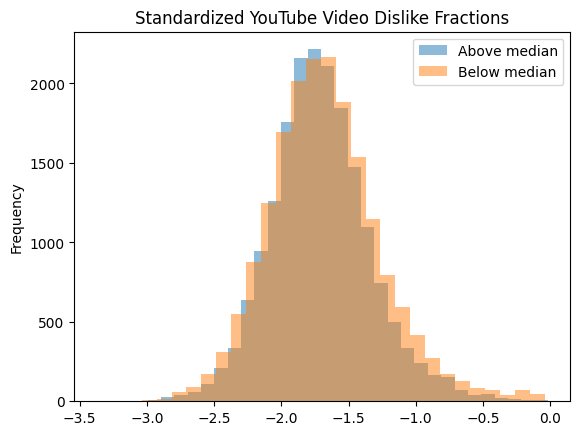

In [6]:
# Compute dislike fraction (dislikes / total ratings)
yt_dislike['dislike_fraction'] = yt_dislike['dislikes']/(yt_dislike['dislikes']+yt_dislike['likes'])

# Determine whether view count is below or above median
view_median = yt_dislike['view_count'].median()
yt_dislike['view_median_compare'] = yt_dislike['view_count'].apply(lambda x: 'Below median' if x < view_median else 'Above median')

# Since the dislike fraction is highly skewed left, we standardize it with a logarithm
yt_dislike['standard_dislike_fraction'] = np.log10(yt_dislike['dislike_fraction'])

# Plot dislike fractions by view count group
yt_median_groups = yt_dislike.groupby('view_median_compare')
ax = yt_median_groups['standard_dislike_fraction'].plot(kind='hist', bins=30, alpha=0.5, title='Standardized YouTube Video Dislike Fractions')

# Add a legend
plt.legend(labels=yt_median_groups.groups.keys())

We use a two-sided t-test to compare the means of the two groups of data.

In [7]:
ttest_ind(yt_median_groups.get_group('Above median')['standard_dislike_fraction'],
          yt_median_groups.get_group('Below median')['standard_dislike_fraction'])

TtestResult(statistic=-6.829523835865421, pvalue=8.650260011588276e-12, df=37249.0)

The relatively large t-statistic and the extremely low p-value indicate that it is correct to reject the null hypothesis in this case. Thus, we conclude that the number of views that a video has does have a measurable effect on the dislike fraction it receives. Since the t-statistic is negative, we can further say that videos with an above-median view count have a lower dislike fraction on average than videos with a below-median view count.

#### Random Forest Regression
Next, we will use the Spotify dataset. For a second method of analysis, we can instead employ a regressor to determine which features of the song itself have the most predictive impact on YouTube views (note that YouTube views are recorded in the Spotify dataset). There are many types of regressors, but for this analysis we use the powerful Random Forest type of regressor. In this case, we use the columns of the Spotify dataset that relate to qualities of the song (energy, key, loudness, etc.) as the feature labels, which are used to predict the views of the song (the target label).

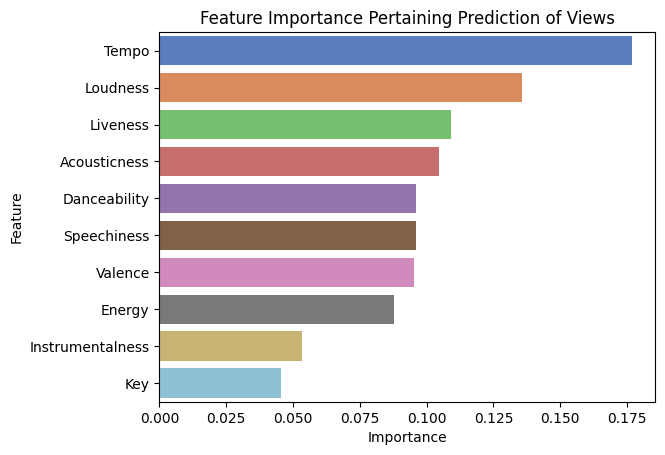

In [8]:
sonic_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
scaler = StandardScaler()

# Standardize feature columns to prevent bias for particular features
X = scaler.fit_transform(spotify_yt[sonic_features])
y = spotify_yt['Views']

# Fit a random forest regressor
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': sonic_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='muted', legend=False)
plt.title('Feature Importance Pertaining Prediction of Views')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

From the plot above, we conclude that tempo is the most impactful feature affecting the number of views that a song gets on YouTube. It is significantly more important than the second-most relevant feature, loudness. On the other end of the spectrum, we see that the key and instrumentalness of a song do not significantly impact the number of views that it receives.



#### Correlation Analysis
For our third exploratory approach, we will use a heatmap to compare all of the features of the data for a single song on both datasets. Compared to the previous two approaches, this approach is even more exploratory, since this gives us a broad overview of the relationships between different aspects of the data, instead of testing a particular statistic of interest.

We join the two datasets using the URL of the YouTube video to find matches between the datasets. Then, we create the heatmap.

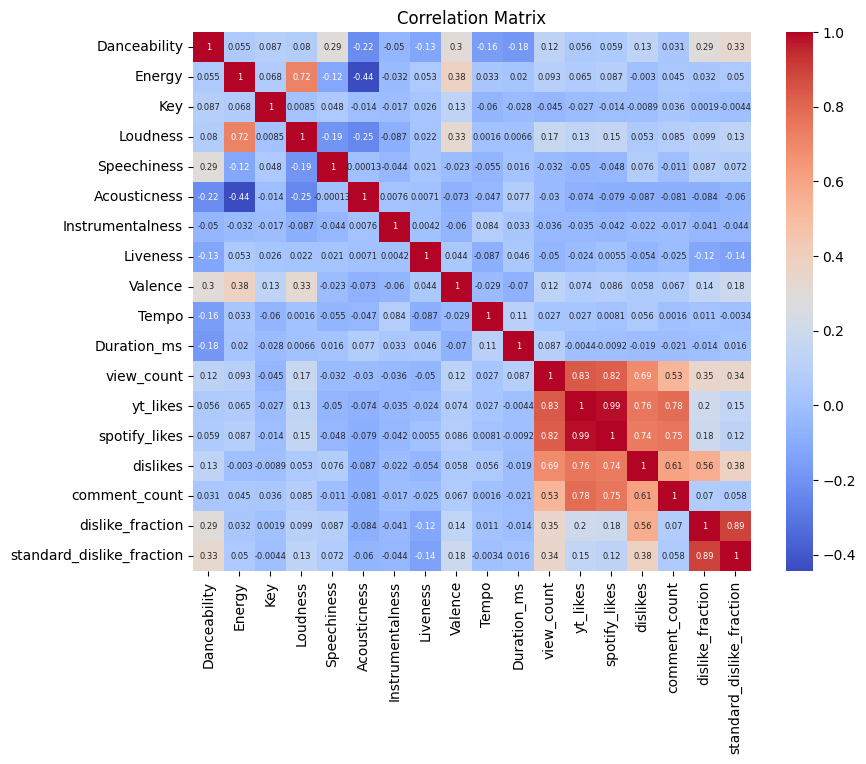

In [9]:
# Merge datasets on matching YouTube URL
yt_dislike['url'] = 'https://www.youtube.com/watch?v='+yt_dislike['video_id']
merged_df = spotify_yt.merge(yt_dislike, left_on='Url_youtube', right_on='url')

merged_df = merged_df.rename(columns={'likes': 'yt_likes', 'Likes': 'spotify_likes'})

features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'view_count', 'yt_likes', 'spotify_likes', 'dislikes', 'comment_count', 'dislike_fraction', 'standard_dislike_fraction']

# Correlation matrix
corr_matrix = merged_df[features].corr()

# Plot
plt.figure(figsize=(9, 7))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
for text in ax.texts:
    text.set_size(6)
plt.title('Correlation Matrix')
plt.show()

According to the correlation matrix, there is a strong relationship between YouTube likes and view count, as well as Spotify likes and view count. This relationship is stronger than the correlation between YouTube dislikes and view count, which means that people tend to view and like something more than they would view and dislike it. Similarly, there is a stronger correlation between comment count and YouTube and Spotify likes than there is between comment count and YouTube dislikes. These are the main observations when cross comparing the two datasets. There do exist some interesting data points within the Spotify data itself, such as the strong relationship between loudness and energy, as well as the weak relationship between acousticness and energy.

## Primary Analysis
For our primary analysis, we will see if songs with similar sonic measurements will have significant similarities in engagement patterns on YouTube. To test for this, we first perform $k$-means clustering on the set of songs in the Spotify dataset. Note that we are also analyzing songs that do not appear in the YouTube dataset, since we are only trying to cluster songs based on sonic qualities, which can be done without regard to performance on YouTube.

We use the elbow method to find the optimal hyperparameter $k$, the number of clusters. Using this method, we minimize the sum of the squared distances from each of the datapoints to the centers of their corresponding clusters. The `inertia_` attribute from sklearn's KMeans class contains this sum.

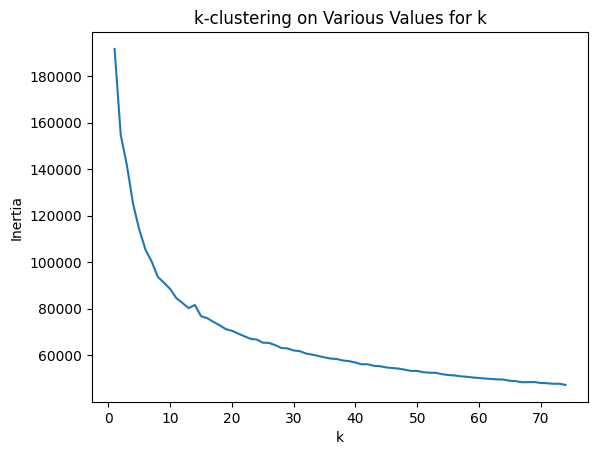

In [14]:
# Like with the second exploratory approach, we make sure to standardize the columns before analysis
scaled_features = scaler.fit_transform(spotify_yt[sonic_features])

distance_sum = []
k_max = 75
for k in range(1, k_max):
  kmeans = KMeans(n_clusters=k, n_init='auto').fit(scaled_features)
  distance_sum.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, k_max), distance_sum)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('k-clustering on Various Values for k')
plt.show()

Through visual inspection, we find an elbow of this graph at around $k=10$, after which additional clusters give diminishing reductions in inertia. Using this hyperparameter value, we can assign a cluster label to every song in the merged dataframe.

In [54]:
kmeans = KMeans(n_clusters=10, n_init='auto').fit(scaled_features)
spotify_yt['Cluster'] = kmeans.labels_

# Determine label for each element of merged dataframe by using the Spotify dataframe
merged_df = merged_df.merge(spotify_yt[['Url_youtube', 'Cluster']], on='Url_youtube')
merged_df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,dislikes,comment_count,tags,description,comments,dislike_fraction,view_median_compare,standard_dislike_fraction,url,Cluster
0,48,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,My Universe,Music Of The Spheres,album,spotify:track:46HNZY1i7O6jwTA7Slo2PI,0.573,0.711,1.0,...,74727,405814,Coldplay BTS My Universe Official video Offici...,"Coldplay X BTS - My Universe - The new single,...",My universe is not just a song but a prove tha...,0.010120,Above median,-1.994839,https://www.youtube.com/watch?v=3YqPKLZF_WU,2
1,48,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,My Universe,Music Of The Spheres,album,spotify:track:46HNZY1i7O6jwTA7Slo2PI,0.573,0.711,1.0,...,74727,405814,Coldplay BTS My Universe Official video Offici...,"Coldplay X BTS - My Universe - The new single,...",My universe is not just a song but a prove tha...,0.010120,Above median,-1.994839,https://www.youtube.com/watch?v=3YqPKLZF_WU,2
2,48,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,My Universe,Music Of The Spheres,album,spotify:track:46HNZY1i7O6jwTA7Slo2PI,0.573,0.711,1.0,...,74727,405814,Coldplay BTS My Universe Official video Offici...,"Coldplay X BTS - My Universe - The new single,...",My universe is not just a song but a prove tha...,0.010120,Above median,-1.994839,https://www.youtube.com/watch?v=3YqPKLZF_WU,2
3,48,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,My Universe,Music Of The Spheres,album,spotify:track:46HNZY1i7O6jwTA7Slo2PI,0.573,0.711,1.0,...,74727,405814,Coldplay BTS My Universe Official video Offici...,"Coldplay X BTS - My Universe - The new single,...",My universe is not just a song but a prove tha...,0.010120,Above median,-1.994839,https://www.youtube.com/watch?v=3YqPKLZF_WU,2
4,48,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,My Universe,Music Of The Spheres,album,spotify:track:46HNZY1i7O6jwTA7Slo2PI,0.573,0.711,1.0,...,74727,405814,Coldplay BTS My Universe Official video Offici...,"Coldplay X BTS - My Universe - The new single,...",My universe is not just a song but a prove tha...,0.010120,Above median,-1.994839,https://www.youtube.com/watch?v=3YqPKLZF_WU,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6618394,20576,Silk Sonic,https://open.spotify.com/artist/6PvvGcCY2XtUcS...,Put On A Smile,An Evening With Silk Sonic,album,spotify:track:5f7UJCMrA1VRLvbPrq1h0G,0.548,0.627,9.0,...,602,4215,bruno bruno mars anderson paak paak silk sonic...,An Evening with Silk Sonic available now: http...,"This duo, This song, The rest of the album, Pu...",0.006294,Above median,-2.201088,https://www.youtube.com/watch?v=5twpnDFJpxo,1
6618395,20578,Silk Sonic,https://open.spotify.com/artist/6PvvGcCY2XtUcS...,Leave The Door Open - Live,Leave The Door Open (Live),single,spotify:track:3XFY3bKOme4E3QhJqHS1Pi,0.532,0.683,5.0,...,7216,14924,bruno bruno mars anderson paak silk sonic leav...,"Bruno Mars, Anderson .Paak, Silk Sonic - Leave...",glad to see there is still some of this type o...,0.012690,Above median,-1.896532,https://www.youtube.com/watch?v=yoWJfsk0gvk,5
6618396,20593,João Gomes,https://open.spotify.com/artist/4JNo6Q5KdcRf1v...,Meu Pedaço de Pecado,Eu Tenho a Senha,album,spotify:track:2kJRlOyrxsy7Ot3c5TZ8Q6,0.668,0.887,11.0,...,16850,9105,joao gomes joao ta na voz dvd ao vivo musica n...,#MeuPedaoDePecado #JooGomes #DVD #Fortaleza E...,Depois que voc conhece as msicas do Joo Gomes ...,0.022576,Above median,-1.646353,https://www.youtube.com/watch?v=H1DEczvTjgE,8
6618397,20627,IVE,https://open.spotify.com/artist/6RHTUrRF63xao5...,ELEVEN,ELEVEN,single,spotify:track:7n2FZQsaLb7ZRfRPfEeIvr,0.828,0.731,9.0,...,16618,59657,Kpop girl group 1theK Starshiptv starship MV...,IVE Twitter : https://twitter.com/IVEstarship ...,omg !! they are so young and......pretty !!!! ...,0.016928,Above median,-1.771394,https://www.youtube.com/watch?v=--FmExEAsM8,8


With the clusters identified, we can now perform an ANOVA test on the different groups to see if there is any significant variation in the means of the various engagement statistics (view count, likes, dislikes, and number of comments).

We use the splat operator (`*`) to pass in a list of length $k$ to the ANOVA function `f_oneway`. This operator automatically takes each element of the list and passes it as a separate parameter to `f_oneway`, which is helpful so we can avoid manually sending $k$ parameters.

In [55]:
engage_stats = ['view_count', 'yt_likes', 'dislikes', 'comment_count']
engage_groups = merged_df.groupby('Cluster')[engage_stats]

anova_results = {}
for stat in engage_stats:
    cluster_stats = []
    for _, cluster in engage_groups:
      cluster_stats.append(cluster[stat])

    # Perform ANOVA
    anova_results[stat] = f_oneway(*cluster_stats)

anova_results

{'view_count': F_onewayResult(statistic=906003.0718449949, pvalue=0.0),
 'yt_likes': F_onewayResult(statistic=225405.33540059754, pvalue=0.0),
 'dislikes': F_onewayResult(statistic=349057.520786543, pvalue=0.0),
 'comment_count': F_onewayResult(statistic=452448.54669539246, pvalue=0.0)}

The high F statistics and low p-values in all four cases imply that there is significant statistical variation between the clusters in all four categories of engagement (the p-values are so low that they are displayed as zero). We can now apply a post hoc test to determine which pairs of clusters differ, across all four metrics. We choose Tukey's HSD test for this purpose.

In [56]:
for stat in engage_stats:
  hsd = pairwise_tukeyhsd(merged_df[stat], merged_df['Cluster'])
  print(stat)
  print(hsd)

view_count
            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower           upper      reject
---------------------------------------------------------------------------
     0      1  -28260760.9392    0.0  -28865885.7571  -27655636.1213   True
     0      2  125981432.5875    0.0  125615034.7462  126347830.4289   True
     0      4  127853321.3429    0.0  125021123.7503  130685518.9356   True
     0      5   17340981.3559    0.0   11685714.3762   22996248.3356   True
     0      6  269600080.1067    0.0  269157304.9754   270042855.238   True
     0      7   26721406.6283 0.9219  -35502288.0193   88945101.2759  False
     0      8  221892488.7089    0.0  221530240.0271  222254737.3907   True
     0      9    47989895.061    0.0   47623198.4384   48356591.6836   True
     1      2  154242193.5267    0.0   153556319.944  154928067.1095   True
     1      4  156114082.2821    0.0  153223144.9951  159005019.5691   True
 

## Visualization
We can make a heatmap of the clusters to show which ones differ in a statisically significant way, for each of the four statistics.

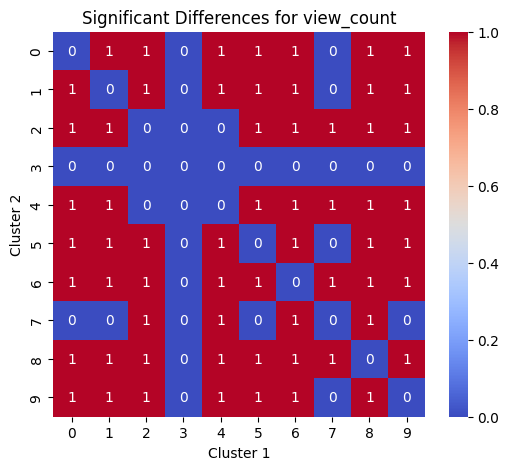

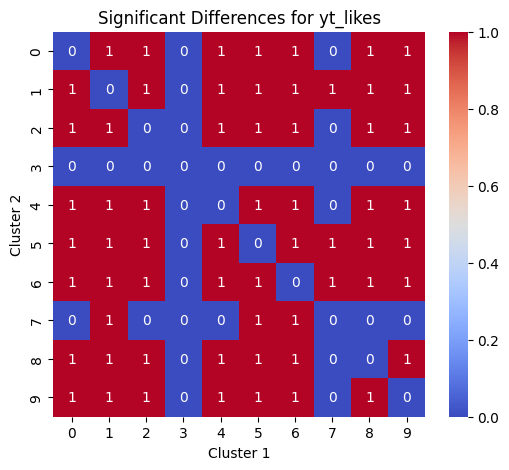

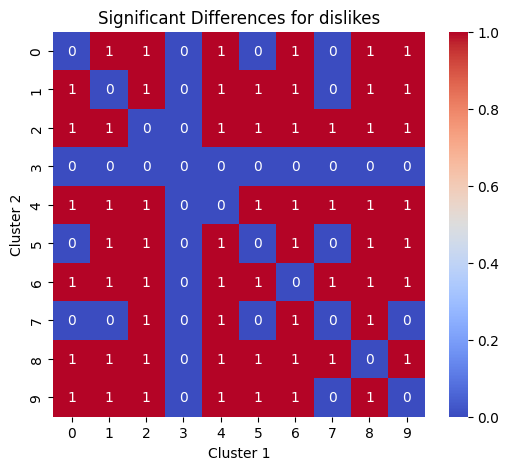

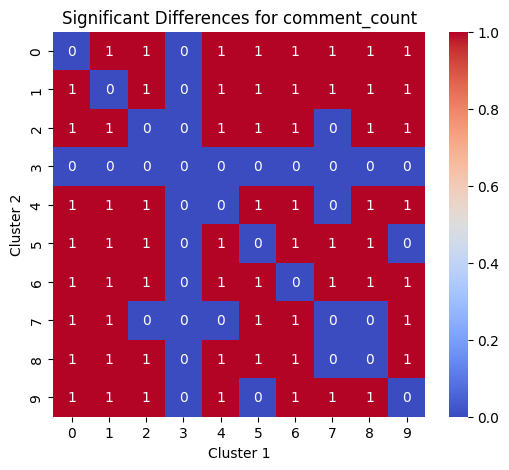

In [80]:
for stat in engage_stats:
  significant_matrix = []
  for r in range(0, 10):
    significant_matrix.append([])
    for c in range(0, 10):
      significant_matrix[r].append(False)

  hsd = pairwise_tukeyhsd(merged_df[stat], merged_df['Cluster'])
  raw_hsd = hsd.summary().data

  for i in range(1, len(raw_hsd)):
    cluster_1 = raw_hsd[i][0]
    cluster_2 = raw_hsd[i][1]
    reject = raw_hsd[i][6]
    significant_matrix[cluster_1][cluster_2] = reject
    significant_matrix[cluster_2][cluster_1] = reject

  plt.figure(figsize=(6, 5))
  ax = sns.heatmap(significant_matrix, annot=True, cmap='coolwarm')
  plt.title(f'Significant Differences for {stat}')
  plt.xlabel('Cluster 1')
  plt.ylabel('Cluster 2')
  plt.show()

## Insights and Conclusions
In the above heatmaps, a value of one (red) indicates that the difference between the clusters is significant enough to reject the null hypothesis. We note that none of the data in the merged dataframe was in cluster 3, so we cannot reject the null hypothesis for how that cluster compares to the others (this is why the row and column corresponding to this cluster is completely blue). Also, the main diagonal is trivially blue since each cluster is identical to itself. Other than these rows, columns, and diagonals, there are very few blue cells in any of the heatmaps. This demonstrates that songs that fit into sonically different categories tend to perform differently according to multiple YouTube metrics. Some pairs of clusters perform similarly on YouTube: for example, clusters 7 and 9 do not have significantly different views, likes, or dislikes. However, for the most part, the hypothesis that differences in performance is correlated to the sound qualities of the song is correct.